In [1]:
# Cell 1 — imports and notebook settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook visuals
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,4)
sns.set(style="whitegrid")

In [3]:
from google.colab import files

uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles (1).csv


In [4]:
df = pd.read_csv("netflix_titles.csv")   # or "netflix.csv" if you renamed
print("Rows, Columns:", df.shape)
df.head(5)

Rows, Columns: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# data info and missing values
df.info()
print("\nMissing values per column:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing values per column:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in    

In [6]:
#basic cleaning
# Trim whitespace from column names
df.columns = df.columns.str.strip()

# Convert 'date_added' to datetime if exists
if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Fill small missing values for demonstration (not destructive)
df['country'] = df['country'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


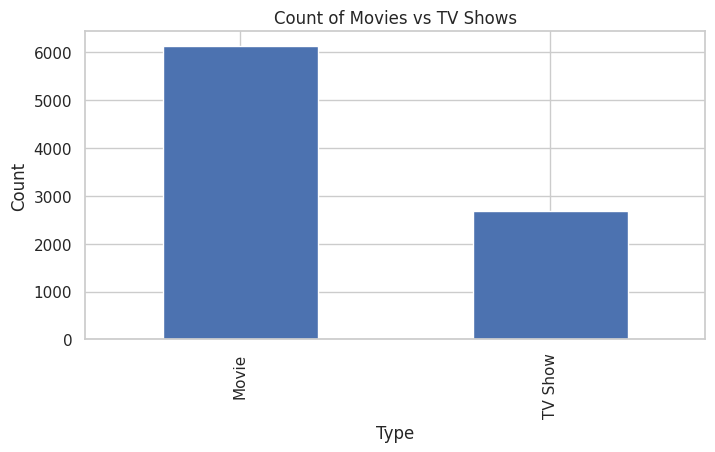

In [7]:
#Movies vs TV Shows
type_count = df['type'].value_counts()
print(type_count)

# Plot
ax = type_count.plot(kind='bar')
ax.set_title("Count of Movies vs TV Shows")
ax.set_xlabel("Type")
ax.set_ylabel("Count")
plt.show()

primary_country
United States     3211
India             1008
Unknown            831
United Kingdom     628
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
Mexico             134
Name: count, dtype: int64


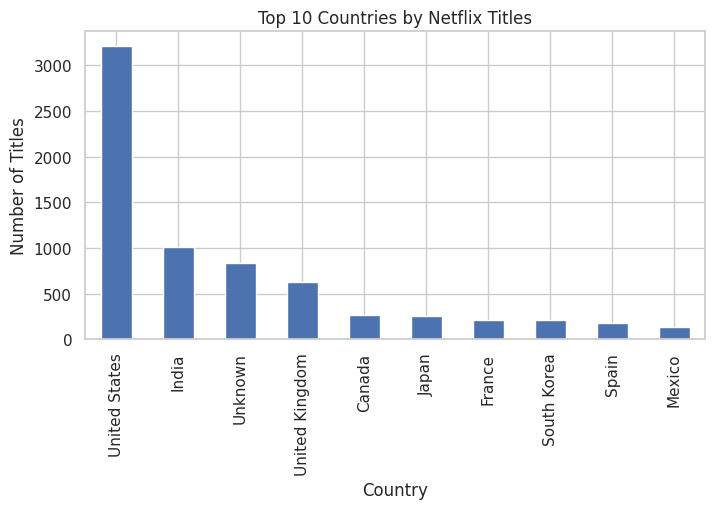

In [8]:
#Top countries
# Sometimes 'country' column contains multiple countries separated by comma.
# We'll take the first country if that is the case.
def first_country(s):
    try:
        return s.split(",")[0].strip()
    except:
        return s

df['primary_country'] = df['country'].apply(first_country)
top_countries = df['primary_country'].value_counts().head(10)
print(top_countries)

top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Netflix Titles")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()

director
Unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Name: count, dtype: int64


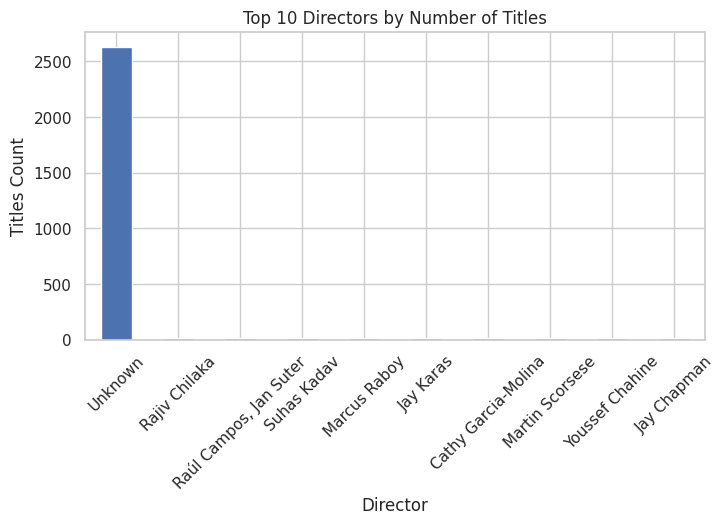

In [9]:
#Top directors
top_directors = df['director'].value_counts().head(10)
print(top_directors)

top_directors.plot(kind='bar')
plt.title("Top 10 Directors by Number of Titles")
plt.xlabel("Director")
plt.ylabel("Titles Count")
plt.xticks(rotation=45)
plt.show()

year_added
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64


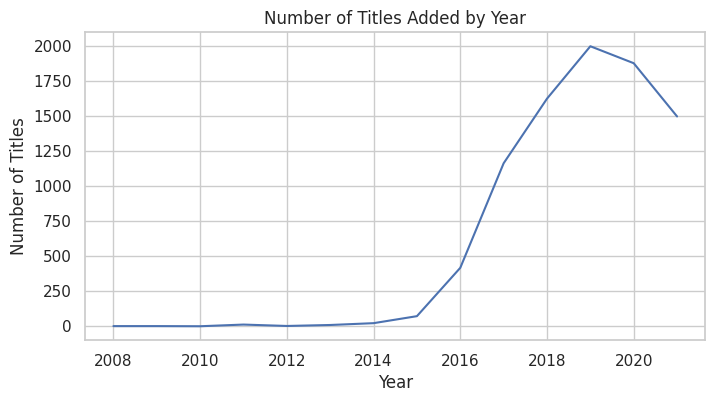

In [10]:
#Titles added by year (if date_added exists)
if 'date_added' in df.columns:
    df['year_added'] = df['date_added'].dt.year
    year_counts = df['year_added'].value_counts().sort_index()
    print(year_counts.tail(10))
    year_counts.plot()
    plt.title("Number of Titles Added by Year")
    plt.xlabel("Year")
    plt.ylabel("Number of Titles")
    plt.grid(True)
    plt.show()
else:
    print("date_added column not present or not parsed.")

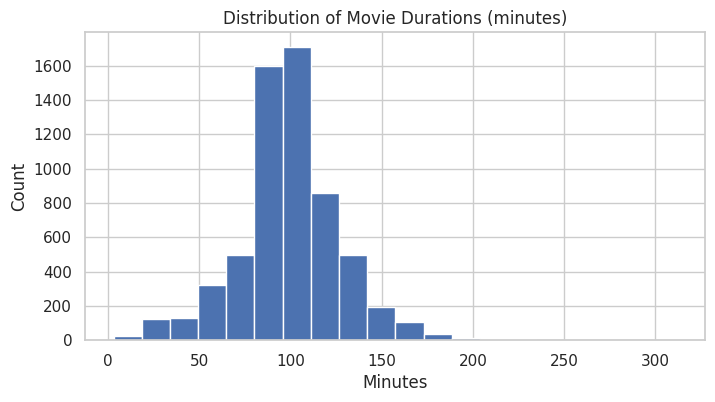

In [11]:
# Runtime / duration distribution (if present)
if 'duration' in df.columns:
    # duration often like "90 min" or "3 Seasons" — try to parse minutes if available
    mins = df[df['duration'].str.contains('min', na=False)]['duration'].str.replace(' min','').astype(int)
    mins.describe()
    mins.hist(bins=20)
    plt.title("Distribution of Movie Durations (minutes)")
    plt.xlabel("Minutes")
    plt.ylabel("Count")
    plt.show()
else:
    print("duration column not present.")

In [12]:
#save a small cleaned CSV (good to upload to GitHub)
clean_sample = df.head(100)   # small sample to keep repo lightweight
clean_sample.to_csv("netflix_sample.csv", index=False)
print("Saved netflix_sample.csv")

Saved netflix_sample.csv


# Key Findings
- Netflix has more Movies than TV Shows (or vice versa).
- Top producing countries are: US, UK, India, ...
- Growth in titles peaked in YEAR.
- Many directors are missing information — dataset has incomplete metadata.